
<h1 style="color:#183D3D"> Introduction:</h1>
<br> 
 <h4 style="color:#183D3D"> In today's data-driven world, understanding and extracting insights from unstructured text data, such as customer reviews, have become paramount for businesses aiming to enhance customer satisfaction and refine their products or services. The project at hand focuses on leveraging sentiment analysis to classify reviews as either positive or negative, providing valuable insights into customer opinions and sentiments. </h4>

<h1 style="color:#183D3D"> Objective:</h1>
<br> 

<h4 style="color:#183D3D"> The primary objective of this project is to develop an automated sentiment analysis system capable of accurately determining the sentiment expressed in amazon customer reviews. By employing natural language processing techniques</h4>

<h1 style="color:#183D3D"> Methodology:</h1>
<br>

<h4 style="color:#183D3D"> 
    
> Data Collection: The Dataset used in this project collected from amazon customer reviews 
    
> Prepare : Load ,Read , Clean and Transfrom The Data as much as needed to ensure the quality of the input data,
    
> Preprocessing:  a series of preprocessing steps were undertaken, including tokenization, stop-word removal, and stemming/lemmatization. These steps help in standardizing the text and reducing noise , 
    
> sentiment analysis : classify weither the Review is Positive , Negative or Neutral 
    
We Will use VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach to both Preprocessing and sentiment analysis 




<img src="https://calln.com/wp-content/uploads/2019/10/Sentiment-Analysis-Infographic-860x600-860x600.png"> 

In [1]:
#Importing the Important Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path="/kaggle/input/amazon-fine-food-reviews/Reviews.csv"

In [3]:
#load the dataset into a dataframe
dataset=pd.read_csv(file_path)

In [4]:
#read the first 5 rows of the dataset
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#check the dataset shape 
dataset.shape

(568454, 10)

 <h5 syle="solor:#183D3D"> The Data Set Contain of [568454] Rows and [5] Columns</h5> 

In [7]:
#dataset columns name 
dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
#check the missing  values  in the dataset
dataset.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
dataset.isna().sum().sum()

43

<h5 syle="solor:#183D3D"> The Data Set Contain of [43]Nulls Value in the [ProfileName] , [Summary] columns</h5> 

In [11]:
#consider the most important columns for this project 
dataset = dataset[['Id', 'ProductId', #'UserId', 'ProfileName', 'HelpfulnessNumerator',
       #'HelpfulnessDenominator',
                   'Score', #'Time',
                   #'Summary'
                    'Text']].copy()

In [12]:
dataset.shape

(568454, 4)

 <h5 syle="solor:#183D3D"> The Data Set Now Contain 4 columns which these and ignoring the useless one for this project </h5> 
<h5 syle="solor:#183D3D"> 
    
> Id: "Review / Record ID " 
    
> ProductId  : "The ID of the Product   that have been reviewd 
    
> Score: "Review Score Count (0 - 5 ) 
    
> Text :"The Review Text " 
</h5>     
    
 

<h5 syle="solor:#183D3D">  VADER Seniment Scoring
 We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text</h5>
<br>
<h5 syle="solor:#183D3D">   
This uses a "bag of words" approach:
    
> Stop words are removed
    
> each word is scored and combined to a total score.
</h5>

<h5 syle="solor:#183D3D">  How the Sentiment analysis work : 
  
> First Devide the Text into Tokens and give it a standarded code
   
>  find the polarity score( neg/neu/pos/comp for each text)
*     
   +comp value :positive 
*     
   -comp value:Negative 
*     
   pos:value to detrmine how positve this text is 
*     
   neg:value to detrmine how positve this text is 
*     
   neu:value to detrmine how positve this text is 
   
   </h5>

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #to loop through the dataset row by row 

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
# find the polarity score on the entire dataset
#this will get a dictionary contain the [ID  ,neg, neu , pos ,comp ]
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [16]:
#show the polarity score for each text 
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},

In [30]:
#conver res to dataframe called vasders then merge vaders dataframe with the whole dataset through the Id column 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(dataset, how='left')


In [31]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,Score,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,5,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,4,This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,2,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...


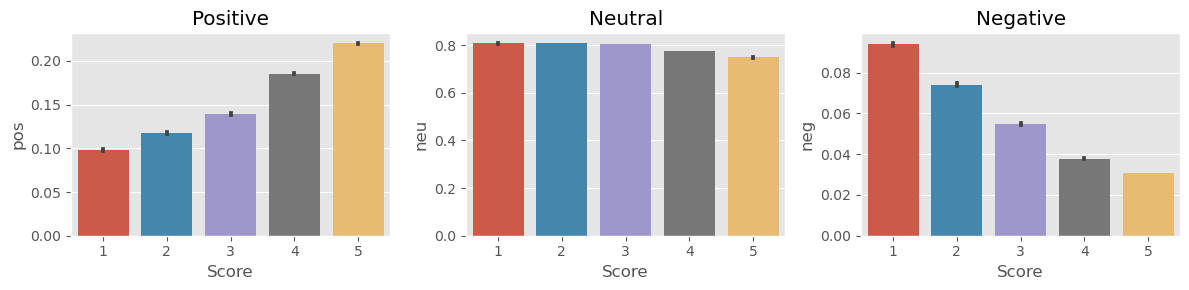

In [32]:
#Plot VADER results 
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

<h3> result : the plots show that for each positive , Neutral , Negative the value of Pos , Neu ,neg is correspond with the score value , The VADER preform well for the sentiment analysis of customer reviews  </h3> 
